<a href="https://colab.research.google.com/github/GonzaloAlbertoForeroBuitrago/Hapi/blob/master/ClipNetCDF_GPM_FileV3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cartopy pyproj

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 81.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.5 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102748 sha256=fb183cee75f8fdcb4eab67632fde45ab7e0557ece3145e6eb2d27a244c6aeebd
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [2]:
pip install regionmask

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.9/69.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 42.0 MB/s eta 0:00:00


In [3]:
pip install rasterio

In [4]:
import os
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import regionmask
import cartopy.crs as ccrs
import pyproj
import cartopy.io.shapereader as shpreader
import fiona
import rasterio
from rasterio.transform import from_origin
import cartopy

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
os.getcwd()

'/content'

In [7]:
os.chdir("/content/drive/MyDrive/IOWA PHD")

In [8]:
os.getcwd()

'/content/drive/MyDrive/IOWA PHD'

In [9]:
!ls -l "/content/drive/MyDrive/IOWA PHD"

total 16
drwx------ 2 root root 4096 Jul  2 22:25  CODIGOS
drwx------ 2 root root 4096 Jul  7 21:25  IMERG_GPM_DIARIO_0_2X0_2
drwx------ 2 root root 4096 Jul 10 14:56  ShapeFilesRecorte
drwx------ 2 root root 4096 Jun  2 22:44 'VIDEOS LLUVIA INDIA CONFERENCIA'


Para asegurar poder escribir en una carpeta de drive

In [9]:
#!chmod +w "/content/drive/MyDrive/IOWA PHD/IMERG_GPM_DIARIO_0_2X0_2_Clip"

chmod: cannot access '/content/drive/MyDrive/IOWA PHD/IMERG_GPM_DIARIO_0_2X0_2_Clip': No such file or directory


In [10]:
ds= xr.open_dataset("IMERG_GPM_DIARIO_0_2X0_2/IMERG_total_precipitation_day_0.2x0.2_global_2021_v6.0.nc")

In [11]:
ds

<xarray.Dataset>
Dimensions:  (time: 300, lon: 1800, lat: 900)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-10-27
  * lon      (lon) float32 -179.9 -179.7 -179.5 -179.3 ... 179.5 179.7 179.9
  * lat      (lat) float32 -89.9 -89.7 -89.5 -89.3 -89.1 ... 89.3 89.5 89.7 89.9
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes: (12/29)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    institution:                KNMI Climate Explorer
    Conventions:                CF-1.0
    title:                      GPM IMERG Final Precipitation L3 1 day 0.1 de...
    cdi:                        Climate Data Interface version 1.9.8 (https:/...
    begindate:                  2000-06-19
    ...                         ...
    geospatial_lon_resolution:  0.2
    climexp_url:                https://climexp.knmi.nl/select.cgi?imerg_dail...
    time_coverage_start:        2000-06-19 00:00:00
    time_coverage_end:          2021-10-27 00:00:00
    history:                    Fri Nov 12 13:01:52 2021: cdo -O -selyear,202...
    CDO:                        Climate Data Operators version 1.9.10 (https:...

In [12]:
ds.data_vars

Data variables:
    pr       (time, lat, lon) float32 ...

In [13]:
da= ds["pr"]
da

<xarray.DataArray 'pr' (time: 300, lat: 900, lon: 1800)>
[486000000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-10-27
  * lon      (lon) float32 -179.9 -179.7 -179.5 -179.3 ... 179.5 179.7 179.9
  * lat      (lat) float32 -89.9 -89.7 -89.5 -89.3 -89.1 ... 89.3 89.5 89.7 89.9
Attributes:
    standard_name:  lwe_precipitation_rate
    long_name:      total daily precipitation
    units:          mm/day

In [14]:
ds.dims

Frozen({'time': 300, 'lon': 1800, 'lat': 900})

In [15]:
ds.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:  (time: 300, lon: 1800, lat: 900)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-10-27
  * lon      (lon) float32 -179.9 -179.7 -179.5 -179.3 ... 179.5 179.7 179.9
  * lat      (lat) float32 -89.9 -89.7 -89.5 -89.3 -89.1 ... 89.3 89.5 89.7 89.9
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes: (12/29)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    institution:                KNMI Climate Explorer
    Conventions:                CF-1.0
    title:                      GPM IMERG Final Precipitation L3 1 day 0.1 de...
    cdi:                        Climate Data Interface version 1.9.8 (https:/...
    begindate:                  2000-06-19
    ...                         ...
    geospatial_lon_resolution:  0.2
    climexp_url:                https://climexp.knmi.nl/select.cgi?imerg_dail...
    time_coverage_start:        2000-06-19 00:00:00
  

In [16]:
ds.pr.coords

Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-10-27
  * lon      (lon) float32 -179.9 -179.7 -179.5 -179.3 ... 179.5 179.7 179.9
  * lat      (lat) float32 -89.9 -89.7 -89.5 -89.3 -89.1 ... 89.3 89.5 89.7 89.9

first time step value

In [17]:
ds.pr[0]

<xarray.DataArray 'pr' (lat: 900, lon: 1800)>
[1620000 values with dtype=float32]
Coordinates:
    time     datetime64[ns] 2021-01-01
  * lon      (lon) float32 -179.9 -179.7 -179.5 -179.3 ... 179.5 179.7 179.9
  * lat      (lat) float32 -89.9 -89.7 -89.5 -89.3 -89.1 ... 89.3 89.5 89.7 89.9
Attributes:
    standard_name:  lwe_precipitation_rate
    long_name:      total daily precipitation
    units:          mm/day

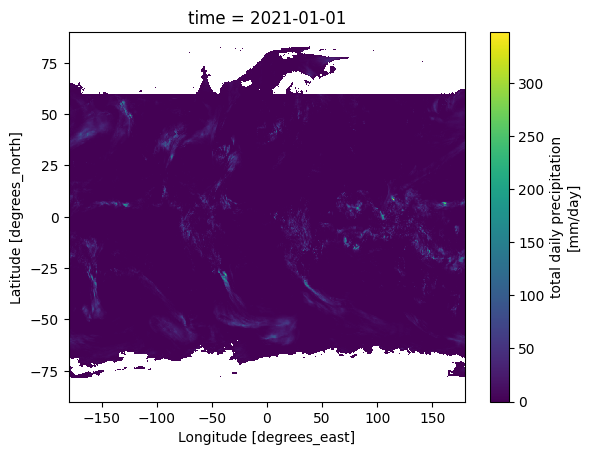

In [18]:
ds.pr[0].plot()

In [19]:
ds.lat

<xarray.DataArray 'lat' (lat: 900)>
array([-89.899994, -89.7     , -89.5     , ...,  89.50001 ,  89.700005,
        89.90001 ], dtype=float32)
Coordinates:
  * lat      (lat) float32 -89.9 -89.7 -89.5 -89.3 -89.1 ... 89.3 89.5 89.7 89.9
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

In [20]:
ds.lon

<xarray.DataArray 'lon' (lon: 1800)>
array([-179.9    , -179.7    , -179.5    , ...,  179.5    ,  179.70001,
        179.90001], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.9 -179.7 -179.5 -179.3 ... 179.5 179.7 179.9
Attributes:
    standard_name:  longitude
    long_name:      Longitude
    units:          degrees_east
    axis:           X

In [21]:
print(ds.pr)

<xarray.DataArray 'pr' (time: 300, lat: 900, lon: 1800)>
[486000000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-10-27
  * lon      (lon) float32 -179.9 -179.7 -179.5 -179.3 ... 179.5 179.7 179.9
  * lat      (lat) float32 -89.9 -89.7 -89.5 -89.3 -89.1 ... 89.3 89.5 89.7 89.9
Attributes:
    standard_name:  lwe_precipitation_rate
    long_name:      total daily precipitation
    units:          mm/day


Cambiar la fecha de acuerdo con el data set

In [22]:
ds_SliceT = ds.sel(time = slice("2021-01-01","2021-12-31"))

In [23]:
ds_SliceT

<xarray.Dataset>
Dimensions:  (time: 300, lon: 1800, lat: 900)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-10-27
  * lon      (lon) float32 -179.9 -179.7 -179.5 -179.3 ... 179.5 179.7 179.9
  * lat      (lat) float32 -89.9 -89.7 -89.5 -89.3 -89.1 ... 89.3 89.5 89.7 89.9
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes: (12/29)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    institution:                KNMI Climate Explorer
    Conventions:                CF-1.0
    title:                      GPM IMERG Final Precipitation L3 1 day 0.1 de...
    cdi:                        Climate Data Interface version 1.9.8 (https:/...
    begindate:                  2000-06-19
    ...                         ...
    geospatial_lon_resolution:  0.2
    climexp_url:                https://climexp.knmi.nl/select.cgi?imerg_dail...
    time_coverage_start:        2000-06-19 00:00:00
    time_coverage_end:          2021-10-27 00:00:00
    history:                    Fri Nov 12 13:01:52 2021: cdo -O -selyear,202...
    CDO:                        Climate Data Operators version 1.9.10 (https:...

REad shape file, cambiar la ruta con el shp con el que se requiere recortar

In [24]:
shapefile1 = gpd.read_file('/content/drive/MyDrive/IOWA PHD/ShapeFilesRecorte/DepartamentosGEE_4326.shp')

In [26]:
# Open the shapefile using fiona
with fiona.open('/content/drive/MyDrive/IOWA PHD/ShapeFilesRecorte/DepartamentosGEE_4326.shp') as src1:
    crs1 = src1.crs

# Create a Cartopy CRS object from the shapefile CRS
cartopy_crs1 = ccrs.Projection(crs1)

# Print the CRS information
print(cartopy_crs1)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


<Axes: >

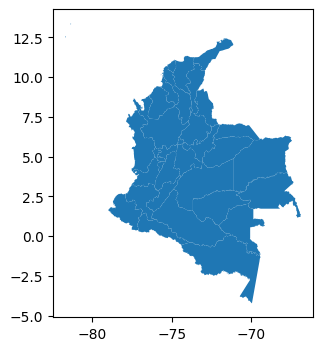

In [27]:
shapefile1.plot(figsize=(5,4))

In [60]:
shapefile2 = gpd.read_file('/content/drive/MyDrive/IOWA PHD/ShapeFilesRecorte/Casanare.shp')

In [29]:
# Open the shapefile using fiona
with fiona.open('/content/drive/MyDrive/IOWA PHD/ShapeFilesRecorte/Casanare.shp') as src2:
    crs2 = src2.crs

# Create a Cartopy CRS object from the shapefile CRS
cartopy_crs2 = ccrs.Projection(crs2)

# Print the CRS information
print(cartopy_crs2)

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]


<Axes: >

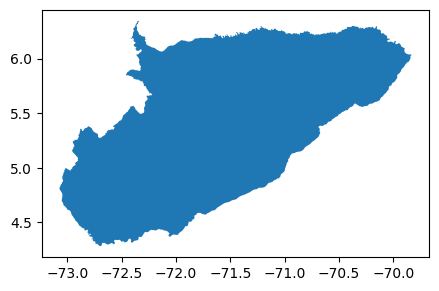

In [30]:
shapefile2.plot(figsize=(5,4))

In [31]:
shapefile2

,OBJECTID,acto_admin,observacio,departamen,cod_depart,shape_leng,shape_area,the_geom_L,the_geom_A,NOMBRE_GEO,CODIGO_NOM,geometry
0,16,NaN,NaN,CASANARE,85,11.975771,3.61252,11.975805,3.61252,CASANARE,85,"POLYGON ((-72.34423 6.34420, -72.34159 6.34364..."


Hacer un recorte del area primero como un recuadro con coordenadas
Con wgs 84 4326
latbound = [sur,norte]
longbound = [oeste,este]

In [32]:
pr_GPM_Daily_sliceCoord = ds_SliceT.sel(lon=slice(-73.81, -69.27), lat= slice(3.83,6.89))

In [33]:
pr_GPM_Daily_sliceCoord

<xarray.Dataset>
Dimensions:  (time: 300, lon: 23, lat: 15)
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-10-27
  * lon      (lon) float32 -73.7 -73.5 -73.3 -73.1 ... -69.9 -69.7 -69.5 -69.3
  * lat      (lat) float32 3.9 4.1 4.3 4.5 4.7 4.9 ... 5.7 5.9 6.1 6.3 6.5 6.7
Data variables:
    pr       (time, lat, lon) float32 ...
Attributes: (12/29)
    CDI:                        Climate Data Interface version 1.9.10 (https:...
    institution:                KNMI Climate Explorer
    Conventions:                CF-1.0
    title:                      GPM IMERG Final Precipitation L3 1 day 0.1 de...
    cdi:                        Climate Data Interface version 1.9.8 (https:/...
    begindate:                  2000-06-19
    ...                         ...
    geospatial_lon_resolution:  0.2
    climexp_url:                https://climexp.knmi.nl/select.cgi?imerg_dail...
    time_coverage_start:        2000-06-19 00:00:00
    time_coverage_end:          2021-10-27 00:00:00
    history:                    Fri Nov 12 13:01:52 2021: cdo -O -selyear,202...
    CDO:                        Climate Data Operators version 1.9.10 (https:...

In [34]:
print(pr_GPM_Daily_sliceCoord.pr)

<xarray.DataArray 'pr' (time: 300, lat: 15, lon: 23)>
[103500 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-10-27
  * lon      (lon) float32 -73.7 -73.5 -73.3 -73.1 ... -69.9 -69.7 -69.5 -69.3
  * lat      (lat) float32 3.9 4.1 4.3 4.5 4.7 4.9 ... 5.7 5.9 6.1 6.3 6.5 6.7
Attributes:
    standard_name:  lwe_precipitation_rate
    long_name:      total daily precipitation
    units:          mm/day


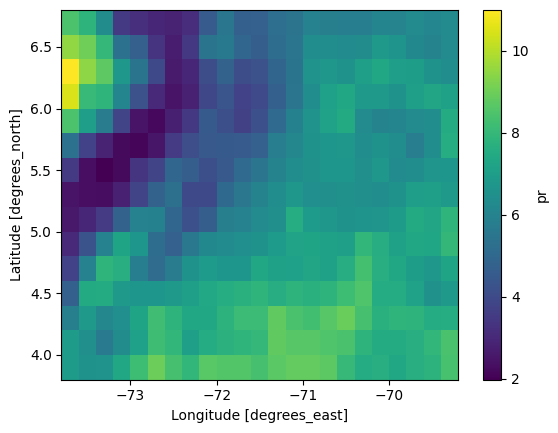

In [35]:
pr_GPM_Daily_slice_meanplot= pr_GPM_Daily_sliceCoord.pr.mean(dim='time').plot()

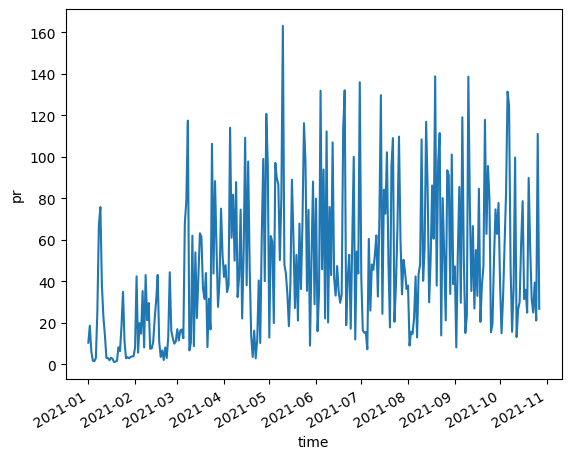

In [36]:
pr_GPM_Daily_slice_maxtrend = pr_GPM_Daily_sliceCoord.pr.max(dim=['lat','lon']).plot()

In [37]:
shapefile2.geometry

0    POLYGON ((-72.34423 6.34420, -72.34159 6.34364...
Name: geometry, dtype: geometry

In [38]:
shapefile2

,OBJECTID,acto_admin,observacio,departamen,cod_depart,shape_leng,shape_area,the_geom_L,the_geom_A,NOMBRE_GEO,CODIGO_NOM,geometry
0,16,NaN,NaN,CASANARE,85,11.975771,3.61252,11.975805,3.61252,CASANARE,85,"POLYGON ((-72.34423 6.34420, -72.34159 6.34364..."


In [39]:
print(shapefile2.geometry)

0    POLYGON ((-72.34423 6.34420, -72.34159 6.34364...
Name: geometry, dtype: geometry


In [58]:
shape= (np.array(shapefile2.geometry)).shape
shape

(1,)

In [ ]:
poly =

In [40]:
coordinates = shapefile2.geometry[0].exterior.coords

In [41]:
print(coordinates)
print(len(coordinates))

9752


In [42]:
# Extract the x and y coordinates from the CoordinateSequence
x_coords = []
y_coords = []
for coord in coordinates:
    x_coords.append(coord[0])
    y_coords.append(coord[1])

In [43]:
# Combine the x and y coordinates into a 2D array
reshaped_coords = np.column_stack((x_coords, y_coords))

In [44]:
# Create the Regions object
poly = regionmask.Regions([reshaped_coords])

In [45]:
mask = poly.mask(pr_GPM_Daily_sliceCoord.isel(time=0), lat_name = "lat", lon_name = "lon")

/usr/local/lib/python3.10/dist-packages/regionmask/core/mask.py:166: FutureWarning: Passing 'lon_name' and 'lat_name' is deprecated. Please pass the lon and lat coordinates direcly, e.g., `mask*(ds[lon_name], ds[lat_name])`.
  warnings.warn(


In [46]:
Shapefile2_clip = pr_GPM_Daily_sliceCoord.where(mask == 0)

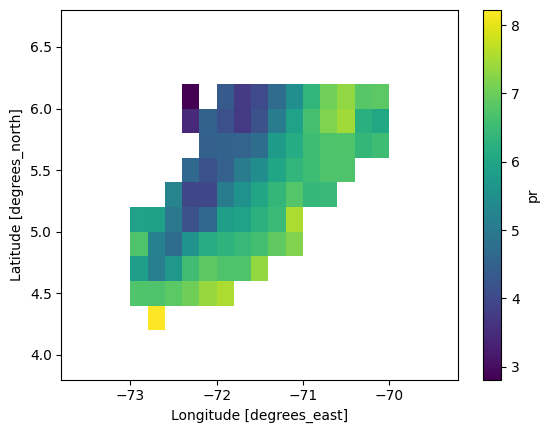

In [47]:
Shapefile2_clip.pr.mean(dim='time').plot()

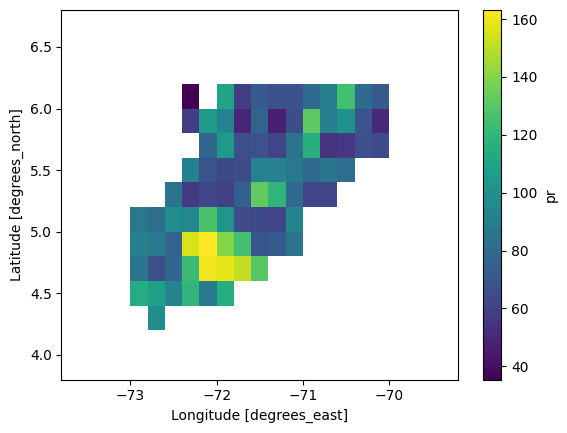

In [48]:
Shapefile2_clip.pr.max(dim='time').plot()